### audion emotion recognition

gender classification at 93%

emotion classification at 50% approx



In [1]:
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd 
import pyaudio

Using TensorFlow backend.


In [3]:
#CHUNK = 1024 
#FORMAT = pyaudio.paInt16 
#CHANNELS = 2 
##RATE = 44100 
#RECORD_SECONDS = 4
#WAVE_OUTPUT_FILENAME = "test audio\\testing.wav"
#
#p = pyaudio.PyAudio()

#stream = p.open(format=FORMAT,
                #channels=CHANNELS,
                #rate=RATE,
                #input=True,
                #frames_per_buffer=CHUNK) #buffer

#print("* recording")

#frames = []

#for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    #data = stream.read(CHUNK)
    #frames.append(data) # 2 bytes(16 bits) per channel

#print("* done recording")

* recording
* done recording


#### Source of audio recorded is from youtube

###### link:
            
            https://www.youtube.com/watch?v=DM1Ylv7-DA8

In [25]:
chunk=1024
sample_format=pyaudio.paInt16
channels=2
fs=44100#record at 44100 samples per second
seconds=4

filename="testing_LPU.wav"
p=pyaudio.PyAudio()#create an interface for PortAudio

print('recording')

stream=p.open(format=sample_format,channels=channels,rate=fs,frames_per_buffer=chunk,input=True)
frames=[]#initializw an array to store frames

#storing the data in chunks for 3 seconds
for i in range(0,int(fs/chunk*seconds)):
    data=stream.read(chunk)
    frames.append(data)
    
#stop and clsoe the stream
stream.stop_stream()
stream.close()
#terminating the PYaudio interfface
p.terminate()
print('Finished recording')

#saving the recroded 
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

recording
Finished recording


In [26]:
data,sampling_rate=librosa.load('testing_LPU.wav')
ipd.Audio('testing_LPU.wav')

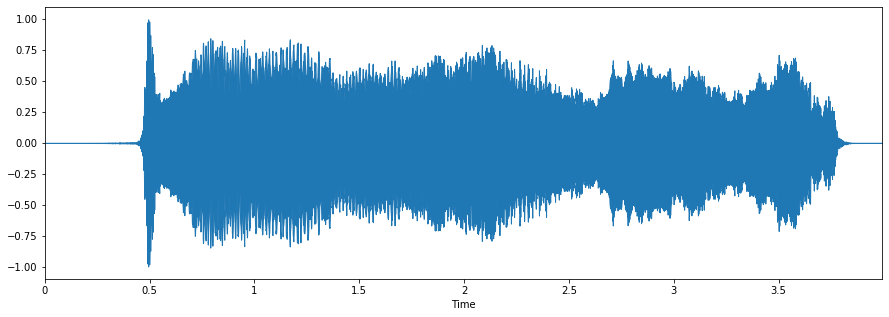

In [27]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sr=sampling_rate)

In [28]:
#lets seee what is the emotion type of our recrded voice
json_file=open('model_json.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# the optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)


Loaded model from disk


In [29]:
##sampling our recrded data
X, sample_rate = librosa.load('testing_LPU.wav'
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-5.118157,-9.915915,-20.496566,-18.963564,-18.864389,-20.179051,-19.199048,-17.844298,-21.362056,-23.375766,...,-18.182824,-18.38647,-18.246534,-16.303023,-16.855627,-19.099432,-17.867117,-17.624468,-18.761624,-17.26099


In [30]:
#running the prediction
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 229ms/step


array([[2.33371933e-10, 6.18126990e-07, 9.99998927e-01, 2.87300095e-09,
        8.72568727e-13, 5.56579103e-08, 1.13989138e-07, 2.88610558e-09,
        1.12160316e-10, 6.13955067e-11, 6.64186645e-16, 1.48241674e-19,
        1.90396776e-07, 4.08216733e-12]], dtype=float32)

In [31]:
filename='labels'
infile=open(filename,'rb')
lb=pickle.load(infile)

#get the final predicted label
final=newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final)

['female_fear']


the voice is recorded from youtube where a female is screaming in fear and our model predict the same.